# importing libraries

In [5]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")


# reading and understanding the dataset

In [6]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# to check no.of rows and no.of columns in dataset

In [8]:
df.shape

(768, 9)

In [9]:
#we are having 768 rows and 9 columns in the dataset

# data preprocessing

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# no missing values

In [12]:
#we are having the outliers in all the columns so lets traet them before going into the model devolopment

<Axes: >

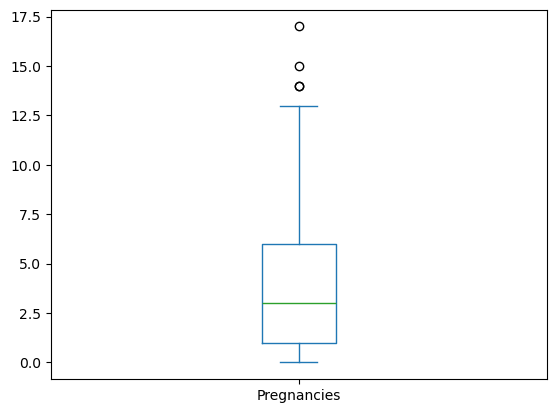

In [13]:
df["Pregnancies"].plot(kind="box")

In [14]:
# replacing the outliers with median 

In [15]:
# Function to replace outliers with the  median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the  median
    median = round(df[column].median())
    
    # Replace outliers with the  median
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

# Apply this function to all columns with outliers
for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    replace_outliers_with_median(df, column)

<Axes: >

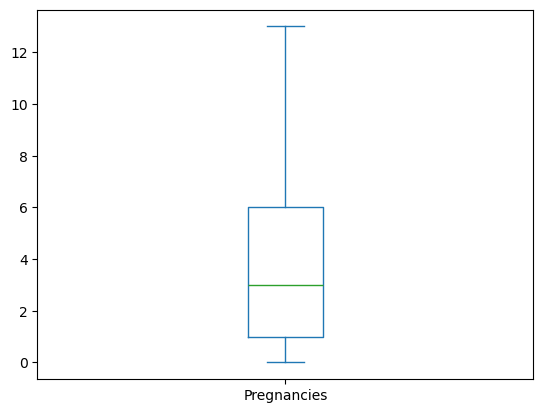

In [16]:
df["Pregnancies"].plot(kind="box")

In [17]:
# now we have treated the outliers there are no ouliers in our dataset,there is no outliers in our dataset

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# model devolopment

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,0.000,33,1


In [44]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)


# logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log=LogisticRegression()

In [58]:
log.fit(x_train, y_train)

LogisticRegression()

In [59]:
y_pred=log.predict(x_test)

# evalution

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [61]:
accuracy=accuracy_score(y_test,y_pred)

In [62]:
print(accuracy)

0.7792207792207793


In [63]:
precision=precision_score(y_test,y_pred)

In [64]:
print(precision)

0.6666666666666666


# randon forest classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier()

In [67]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
y_pred=rf.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [70]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7987012987012987


In [71]:
def prediction(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    outcome=rf.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])[0]
    if outcome==0:
        return "NO DIABETES"
    else:
        return "HAVING DIABETES"

In [72]:
prediction(6, 148, 72,35, 0 ,33.6,	0.627,	50)

'HAVING DIABETES'

In [73]:
prediction(1, 85, 66,29, 0 ,26.6,	0.351,	31)

'NO DIABETES'

# gradio application

In [41]:
import gradio as gr 

In [42]:
demo=gr.Interface(fn=prediction,inputs=["number","number","number","number","number","number","number","number"],
             outputs="text", title="Diabete prediction")

In [43]:
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://f67d452e693e74cb87.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
